# Import Libraries and Datasets; Adjust Datasets to Reflect Households in Bihar

In [1]:
!pip install eep153_tools
!pip install -r requirements.txt

  Using cached eep153_tools-0.11-py2.py3-none-any.whl (4.4 kB)
  Using cached CFEDemands-0.4.1-py2.py3-none-any.whl (39 kB)
  Using cached numpy-1.22.3-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (16.8 MB)
  Using cached oauth2client-4.1.3-py2.py3-none-any.whl (98 kB)
  Using cached pandas-1.4.2-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (11.7 MB)
  Using cached plotly-5.7.0-py2.py3-none-any.whl (28.8 MB)
Processing /home/jovyan/.cache/pip/wheels/20/7e/30/7d702acd6a1e89911301cd9dbf9cb9870ca80c0e64bc2cde23/gnupg-2.3.1-py3-none-any.whl
  Using cached ConsumerDemands-0.3.dev0-py2.py3-none-any.whl (12 kB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.5
    Uninstalling numpy-1.21.5:
      Successfully uninstalled numpy-1.21.5
  Attempting uninstall: pandas
    Found existing installation: pandas 1.3.5
    Uninstalling pandas-1.3.5:
      Successfully uninstalled pandas-1.3.5
  Attempting uninstall: plotly
    Found existing installatio

In [2]:
!pip install pyarrow

  Using cached pyarrow-7.0.0-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (26.7 MB)


In [3]:
import cfe
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Missing dependencies for OracleDemands.


In [4]:
z =  pd.read_parquet('z.parquet', engine = 'pyarrow')

In [5]:
q =  pd.read_parquet('q.parquet', engine = 'pyarrow').unstack(['j'])


We also need to make sure that we only include households in Bihar, so we filter out households in other states below.

In [6]:
z_bihar = z[z['m'] == 'Bihar']
bihar_households = z_bihar.index
q_adjusted = q.T.reset_index()
q_bihar = q_adjusted[q_adjusted['j'].isin(bihar_households)]
q_bihar

i,level_0,j,apple,arhar (tur),baby food,bajra & products,banana,barley & products,beef,beer,...,toddy,tomato,turmeric,urd,"vanaspati, margarine",walnut,watermelon,wheat/atta - P.D.S.,wheat/atta - other sources,"zarda,kimam,surti"
unit,,,kg,kg,kg,kg,no.,kg,kg,litre,...,litre,kg,gm,kg,kg,kg,kg,kg,kg,gm
Frequency,,,Monthly,Monthly,Monthly,Monthly,Monthly,Monthly,Monthly,Monthly,...,Monthly,Monthly,Monthly,Monthly,Monthly,Monthly,Monthly,Monthly,Monthly,Monthly
28968,total_quantity,470441101,NaN,2500.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2000.0,150.0,NaN,NaN,NaN,NaN,NaN,25000.0,NaN
28969,total_quantity,470441102,NaN,1000.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,100.0,NaN,NaN,NaN,NaN,NaN,30000.0,NaN
28970,total_quantity,470441201,NaN,3000.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,5000.0,500.0,NaN,NaN,NaN,NaN,NaN,60000.0,NaN
28971,total_quantity,470441202,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,5000.0,250.0,NaN,NaN,NaN,NaN,NaN,30000.0,NaN
28972,total_quantity,470441203,NaN,2000.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2000.0,500.0,NaN,NaN,NaN,NaN,NaN,30000.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71100,total_quantity,746991301,NaN,NaN,NaN,NaN,24.0,NaN,NaN,NaN,...,NaN,1000.0,200.0,NaN,NaN,NaN,NaN,NaN,30000.0,NaN
71101,total_quantity,746992101,2000.0,NaN,NaN,NaN,24.0,NaN,NaN,NaN,...,NaN,2000.0,200.0,NaN,NaN,NaN,NaN,NaN,30000.0,NaN


In [7]:
z_bihar

k,rural,m,religion,social group,Males 0-1,Males 1-5,Males 5-10,Males 10-15,Males 15-20,Males 20-30,...,Males 60-100,Females 0-1,Females 1-5,Females 5-10,Females 10-15,Females 15-20,Females 20-30,Females 30-50,Females 50-60,Females 60-100
j,,,,,,,,,,,,,,,,,,,,,
470441101,Urban,Bihar,Hinduism,Other backward class,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
470441102,Urban,Bihar,Hinduism,Other backward class,0,0,0,0,1,2,...,0,0,0,0,0,0,0,0,0,0
470441201,Urban,Bihar,Hinduism,Other backward class,0,1,1,0,1,0,...,0,0,0,1,1,0,0,1,0,0
470441202,Urban,Bihar,Hinduism,Other backward class,0,0,1,2,0,0,...,0,0,0,0,0,0,0,1,0,0
470441203,Urban,Bihar,Hinduism,Other backward class,0,0,0,0,0,2,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
746991301,Rural,Bihar,Hinduism,Other backward class,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,1,0
746992101,Rural,Bihar,Hinduism,Others,0,0,0,0,0,0,...,1,0,1,1,1,0,0,1,0,0
746992201,Rural,Bihar,Hinduism,Other backward class,0,0,0,0,1,0,...,0,1,0,0,0,2,1,1,0,0


In [8]:
x = pd.read_parquet('x.parquet', engine = 'pyarrow').unstack('j')

In [9]:
x_adjusted = x.T.reset_index()
x_bihar = x_adjusted[x_adjusted['j'].isin(bihar_households)]
x_bihar

i,level_0,j,apple,arhar (tur),baby food,bajra & products,banana,barley & products,beef,beer,...,toddy,tomato,turmeric,urd,"vanaspati, margarine",walnut,watermelon,wheat/atta - P.D.S.,wheat/atta - other sources,"zarda,kimam,surti"
Frequency,,,Monthly,Monthly,Monthly,Monthly,Monthly,Monthly,Monthly,Monthly,...,Monthly,Monthly,Monthly,Monthly,Monthly,Monthly,Monthly,Monthly,Monthly,Monthly
28968,total_value,470441101,NaN,150.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,10.0,15.0,NaN,NaN,NaN,NaN,NaN,325.0,NaN
28969,total_value,470441102,NaN,60.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,10.0,NaN,NaN,NaN,NaN,NaN,480.0,NaN
28970,total_value,470441201,NaN,180.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,25.0,40.0,NaN,NaN,NaN,NaN,NaN,900.0,NaN
28971,total_value,470441202,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,50.0,25.0,NaN,NaN,NaN,NaN,NaN,450.0,NaN
28972,total_value,470441203,NaN,130.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,12.0,40.0,NaN,NaN,NaN,NaN,NaN,450.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71100,total_value,746991301,NaN,NaN,NaN,NaN,20.0,NaN,NaN,NaN,...,NaN,8.0,18.0,NaN,NaN,NaN,NaN,NaN,330.0,NaN
71101,total_value,746992101,140.0,NaN,NaN,NaN,40.0,NaN,NaN,NaN,...,NaN,20.0,32.0,NaN,NaN,NaN,NaN,NaN,300.0,NaN
71102,total_value,746992201,240.0,300.0,NaN,NaN,36.0,NaN,NaN,NaN,...,15.0,30.0,20.0,NaN,NaN,NaN,NaN,NaN,750.0,NaN


In [92]:
n =  pd.read_parquet('n.parquet', engine = 'pyarrow')
n

,calories per unit(kcal),fat per unit(gm),i,protein per unit(gm),rural,t,unit
1,3280.000000,13.00,ragi,73.00,NaN,50,kg
4,1100.000000,2.00,other cereal subs.,16.00,NaN,50,kg
5,3420.000000,36.00,maize-other sources,111.00,NaN,50,kg
7,3420.000000,36.00,maize - pds,111.00,NaN,50,kg
8,3360.000000,13.00,barley,115.00,NaN,50,kg
...,...,...,...,...,...,...,...
145,24.700001,0.95,other served processed food,0.70,0.0,68,Re
146,21.100000,0.85,"cake, pastry, prepared sweets",0.20,0.0,68,Re
147,28.500000,0.17,"biscuits, chocolates",0.35,0.0,68,Re
148,24.700001,0.95,"papad, bhujia, namkeen, mixture, chanachur",0.70,0.0,68,Re


# Import RDA Data
RDA is a dataframe indicating the recommended daily allowances in India. As we see below, RDA includes different age/sex groups and ranges than what we see in our household data. So, we created a dataframe, rda_fixed, that shows the recommended daily allowances in India corresponding to the age/sex categories in the datasets we imported above.

In [11]:
rda = pd.read_pickle('indian_rda.df').T 
rda = rda.replace('', np.nan)
rda

,C 0-0.5,C 0.5-1,C 1-3,C 4-6,C 7-9,B 10-12,G 10-12,B 13-15,G 13-15,B 16-17,G 16-17,M,W
Calories,NaN,NaN,1060.0,1350.0,1690.0,2190.0,2010.0,2750.0,2330.0,3020.0,2440.0,2730.0,2230.0
Protein,NaN,NaN,16.7,20.1,29.5,39.9,40.4,54.3,51.9,61.5,55.5,60.0,55.0
Fat,NaN,19.0,27.0,25.0,30.0,35.0,35.0,45.0,40.0,50.0,35.0,30.0,25.0
Calcium,500.0,500.0,600.0,600.0,600.0,800.0,800.0,800.0,800.0,800.0,800.0,600.0,1200.0
Iron,NaN,5.0,9.0,13.0,16.0,21.0,27.0,32.0,27.0,28.0,26.0,17.0,21.0
Betacarotene,NaN,2800.0,3200.0,3200.0,4800.0,4800.0,4800.0,4800.0,4800.0,4800.0,4800.0,4800.0,4800.0
Thiamine,0.2,0.3,0.5,0.7,0.8,1.1,1.0,1.4,1.2,1.5,1.0,1.4,1.1
Riboflavin,0.3,0.4,0.6,0.8,1.0,1.3,1.2,1.6,1.4,1.8,1.2,1.4,1.3
Niacin,NaN,NaN,8.0,11.0,13.0,15.0,13.0,16.0,14.0,17.0,14.0,18.0,14.0
Ascorbic Acid,25.0,25.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0


In [12]:
rda_fixed = pd.DataFrame(index = rda.index)
rda_fixed['Males 60-100'] = rda['M'].to_list()
rda_fixed['Males 50-60'] = rda['M'].to_list()
rda_fixed['Males 30-50'] = rda['M'].to_list()
rda_fixed['Males 20-30'] = rda['M'].to_list()
rda_fixed['Males 15-20'] = (np.array(rda['M']) + np.array(rda['B 16-17'])) / 2
rda_fixed['Males 10-15'] = (np.array(rda['B 10-12']) + np.array(rda['B 13-15'])) / 2
rda_fixed['Males 5-10'] = (np.array(rda['C 4-6']) + np.array(rda['C 7-9'])) / 2
rda_fixed['Males 1-5'] = (np.array(rda['C 1-3']) + np.array(rda['C 4-6'])) / 2
rda_fixed['Males 0-1'] = (np.array(rda['C 0-0.5']) + np.array(rda['C 0.5-1'])) / 2
rda_fixed['Females 60-100'] = rda['W'].to_list()
rda_fixed['Females 50-60'] = rda['W'].to_list()
rda_fixed['Females 30-50'] = rda['W'].to_list()
rda_fixed['Females 20-30'] = rda['W'].to_list()
rda_fixed['Females 15-20'] = (np.array(rda['W']) + np.array(rda['G 16-17'])) / 2
rda_fixed['Females 10-15'] = (np.array(rda['G 10-12']) + np.array(rda['G 13-15'])) / 2
rda_fixed['Females 5-10'] = (np.array(rda['C 4-6']) + np.array(rda['C 7-9'])) / 2
rda_fixed['Females 1-5'] = (np.array(rda['C 1-3']) + np.array(rda['C 4-6'])) / 2
rda_fixed['Females 0-1'] = (np.array(rda['C 0-0.5']) + np.array(rda['C 0.5-1'])) / 2
rda_fixed

,Males 60-100,Males 50-60,Males 30-50,Males 20-30,Males 15-20,Males 10-15,Males 5-10,Males 1-5,Males 0-1,Females 60-100,Females 50-60,Females 30-50,Females 20-30,Females 15-20,Females 10-15,Females 5-10,Females 1-5,Females 0-1
Calories,2730.0,2730.0,2730.0,2730.0,2875.00,2470.00,1520.00,1205.0,NaN,2230.0,2230.0,2230.0,2230.0,2335.00,2170.00,1520.00,1205.0,NaN
Protein,60.0,60.0,60.0,60.0,60.75,47.10,24.80,18.4,NaN,55.0,55.0,55.0,55.0,55.25,46.15,24.80,18.4,NaN
Fat,30.0,30.0,30.0,30.0,40.00,40.00,27.50,26.0,NaN,25.0,25.0,25.0,25.0,30.00,37.50,27.50,26.0,NaN
Calcium,600.0,600.0,600.0,600.0,700.00,800.00,600.00,600.0,500.00,1200.0,1200.0,1200.0,1200.0,1000.00,800.00,600.00,600.0,500.00
Iron,17.0,17.0,17.0,17.0,22.50,26.50,14.50,11.0,NaN,21.0,21.0,21.0,21.0,23.50,27.00,14.50,11.0,NaN
Betacarotene,4800.0,4800.0,4800.0,4800.0,4800.00,4800.00,4000.00,3200.0,NaN,4800.0,4800.0,4800.0,4800.0,4800.00,4800.00,4000.00,3200.0,NaN
Thiamine,1.4,1.4,1.4,1.4,1.45,1.25,0.75,0.6,0.25,1.1,1.1,1.1,1.1,1.05,1.10,0.75,0.6,0.25
Riboflavin,1.4,1.4,1.4,1.4,1.60,1.45,0.90,0.7,0.35,1.3,1.3,1.3,1.3,1.25,1.30,0.90,0.7,0.35
Niacin,18.0,18.0,18.0,18.0,17.50,15.50,12.00,9.5,NaN,14.0,14.0,14.0,14.0,14.00,13.50,12.00,9.5,NaN
Ascorbic Acid,40.0,40.0,40.0,40.0,40.00,40.00,40.00,40.0,25.00,40.0,40.0,40.0,40.0,40.00,40.00,40.00,40.0,25.00


zbar is the proportion of households in Bihar that have each of the age/sex groups shown below.

In [13]:
zbar = z_bihar.mean(axis=0)
zbar

/tmp/ipykernel_25/1843868859.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  zbar = z_bihar.mean(axis=0)


k
Males 0-1         0.028154
Males 1-5         0.235050
Males 5-10        0.352248
Males 10-15       0.370581
Males 15-20       0.328677
Males 20-30       0.442165
Males 30-50       0.661502
Males 50-60       0.192056
Males 60-100      0.202750
Females 0-1       0.023352
Females 1-5       0.211698
Females 5-10      0.300087
Females 10-15     0.299651
Females 15-20     0.225011
Females 20-30     0.401571
Females 30-50     0.634221
Females 50-60     0.181580
Females 60-100    0.150153
dtype: float64

In [14]:
# May need to tweak types or alignment to match RDA and zbar types:
rda0,zbar0=rda_fixed.align(zbar,axis=1) #this method allows us to align columns if there's a different order 

# This matrix product gives minimum nutrient requirements for average
hh_rda = rda0.replace(np.nan,0)@zbar0
# RDA is /daily/, but  demands in ICRISAT data are /monthly/:
hh_rda = hh_rda*30 #household level of RDA, multiplied by 30 because we have them at monthly level
hh_rda #in millions of calories bc it's for all people in household over a year 

Calories         351186.468791
Protein            7596.075949
Fat                4639.635530
Calcium          126497.599302
Iron               2974.773025
Betacarotene     710116.106504
Thiamine            176.340026
Riboflavin          195.825949
Niacin             2306.438237
Ascorbic Acid      6265.429943
dtype: float64

In [96]:
r = cfe.result.from_dataset('bihar.ds',engine='netcdf4')
UseNutrients=['Protein','Calories','Fat']

# Reference period, market
t,m = 1,1 

# Reference budget (find mean in reference period & market):
reference_x = r.get_predicted_expenditures().mean('j').sum('i').sel(m=m)

p = r.prices.sel(m=m,drop=True)
p = p.to_dataframe('i').squeeze().dropna()
p.index = p.index.droplevel()
p

i
apple                                               0.075035
arhar (tur)                                         0.075512
besan                                               0.060223
bread (bakery)                                      0.049760
brinjal                                             0.014824
cabbage                                             0.010304
cauliflower                                         0.012188
chicken                                             0.121698
chillis (green)                                     0.046695
chira                                               0.024698
firewood & chips                                    0.005032
fish ( fresh )                                      0.107222
french beans and barbati                            0.018852
goat meat                                           0.256172
gourd, pumpkin                                      0.009991
gram (split)                                        0.055219
gram (whole)          

In [16]:
def my_prices(p0,p=p,i='Coconut'): #utility function
    p = p.copy()
    p.loc[i] = p0
    return p

In [94]:
n = n.set_index('i').drop(['rural', 't', 'unit'], axis=1)
n = n[n.index.isin(p.index)]
#n = n.drop(labels=['peas-vegetables'])
n = n.rename(columns={'calories per unit(kcal)': 'Calories', 'fat per unit(gm)': 'Fat', 'protein per unit(gm)': 'Protein'})
n

,Calories,Fat,Protein
i,,,
potato,970.0,1.0,16.0
rice - P.D.S.,3460.0,5.0,75.0
rice - other sources,3460.0,5.0,75.0
chira,3460.0,12.0,66.0
muri,3250.0,1.0,75.0
wheat/atta - P.D.S.,3410.0,17.0,121.0
wheat/atta - other sources,3410.0,17.0,121.0
maida,3480.0,9.0,110.0
"suji, rawa",3480.0,8.0,104.0


In [18]:
p = p.drop(labels=['firewood & chips', 'lpg'])
p = p.drop(labels=['salt ', 'peas-vegetables'])

In [26]:
fdc_codes = pd.read_csv('proj_3_fdc_codes.csv').set_index('Item')
fdc_codes = fdc_codes.reset_index()
fdc_codes

,Item,ID
0,apple,1102644
1,arhar (tur),1977550
2,baby food,1102843
3,bajra & products,1799770
4,banana,1102653
...,...,...
90,urd,1898206
91,"vanaspati, margarine",1103828
92,walnut,2118446
93,watermelon,1102698


In [28]:
fdc_codes = fdc_codes[fdc_codes['Item'].isin(n.index)]
len(fdc_codes)

31

In [53]:
Q = fdc_codes
Q['Quantity'] = [1000]*len(fdc_codes)
Q = Q.reset_index()

In [54]:
import fooddatacentral as fdc
apikey = 'CDXgPa1HVqJab8EFllem1ikOF75m2ELYwziKtICr'
D = {}
count = 0
for food in Q.Item.tolist():
    try:
        FDC = Q.loc[Q.Item==food,:].ID[count]
        count+=1
        print(FDC)
        D[food] = fdc.nutrients(apikey,FDC).Quantity
    except AttributeError: 
        warnings.warn("Couldn't find FDC Code %s for food %s." % (food,FDC))        

D = pd.DataFrame(D,dtype=float).fillna(0)

D

1102644
1977550
2091506
1100621
2024758
1103343
1103345
2029648
170497
2216557
175304
168448
1100536
1102666
1942595
2008520
2091229
2155640
172420
1100404
172337
1103364
1103153
1102879
1103374
2129576
2077766
1126152
1103276
1103828
522973


,apple,arhar (tur),besan,bread (bakery),brinjal,cabbage,cauliflower,chicken,chillis (green),french beans and barbati,...,onion,palak,potato,radish,"refined oil [sunflower, soyabean, saffola, etc.]",rice - other sources,"suji, rawa",tomato,"vanaspati, margarine",wheat/atta - other sources
Alanine,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.082,0.0,...,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.0
"Alcohol, ethyl",0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.000,0.0,...,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.0
Amino acids,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.000,0.0,...,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.0
Arginine,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.096,0.0,...,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.0
Ash,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.600,0.0,...,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vitamin K (Dihydrophylloquinone),0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.000,0.0,...,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.0
Vitamin K (phylloquinone),2.20,0.0,0.0,0.20,0.0,38.20,15.50,0.0,14.300,0.0,...,0.40,178.00,4.10,1.30,0.0,0.0,0.0,7.90,101.30,0.0
Vitamins and Other Components,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.000,0.0,...,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.0
Water,85.56,0.0,0.0,35.70,0.0,90.39,92.07,0.0,87.740,0.0,...,89.11,82.03,72.09,95.27,0.0,0.0,0.0,94.52,37.58,0.0


In [19]:
#n.index.sort_values(ascending=True) == p.index

In [20]:
import warnings 

def nutrient_demand(x,p): 
    with warnings.catch_warnings(): #gets rids of messy warnings
        warnings.simplefilter("ignore")
        c = r.demands(x,p) #compute quantities demand for all food

    n0,c0 = n.align(c,axis=0,join='inner') #alignment trick
    
    N = n0.T@c0 #takes quantities demand (c0) and multiplies by fct0

    N = N.loc[~N.index.duplicated()]
    
    return N

Text(0, 0.5, 'log nutrient')

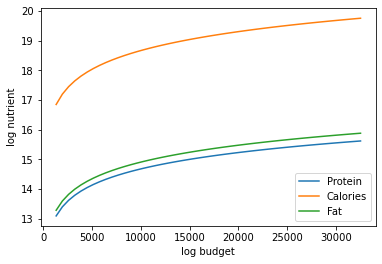

In [95]:
import numpy as np
import matplotlib.pyplot as plt

X = np.linspace(reference_x/5,reference_x*5,50)
X = X.flatten()

UseNutrients = ['Protein','Calories','Fat']

df = pd.concat({myx:np.log(nutrient_demand(myx,p))[UseNutrients] for myx in X},axis=1).T
ax = df.plot()

ax.set_xlabel('log budget') 
ax.set_ylabel('log nutrient')

Text(0, 0.5, 'log nutrient')

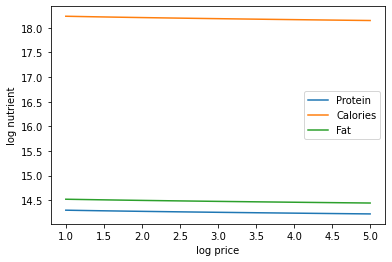

In [113]:
USE_GOOD = 'tomato'

ref_price = r.prices.sel(i=USE_GOOD,m=m,drop=True)

P = np.linspace(1,5,20).tolist()

ndf = pd.DataFrame({p0:np.log(nutrient_demand(reference_x,my_prices(p0,i=USE_GOOD)))[UseNutrients] for p0 in P}).T

ax = ndf.plot()

ax.set_xlabel('log price')
ax.set_ylabel('log nutrient') 

Text(0, 0.5, 'log nutrient')

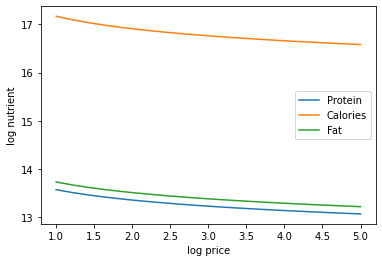

In [112]:
USE_GOOD = "apple"

ref_price = r.prices.sel(i=USE_GOOD,m=m,drop=True)

P = np.linspace(1,5,20).tolist()

ndf = pd.DataFrame({p0:np.log(nutrient_demand(reference_x,my_prices(p0,i=USE_GOOD)))[UseNutrients] for p0 in P}).T

ax = ndf.plot()

ax.set_xlabel('log price')
ax.set_ylabel('log nutrient') 

In [99]:
def nutrient_adequacy_ratio(x,p):
    return nutrient_demand(x,p)/hh_rda #greater than 1 = adequate, less than 1 = less than adequate bc log of ratios

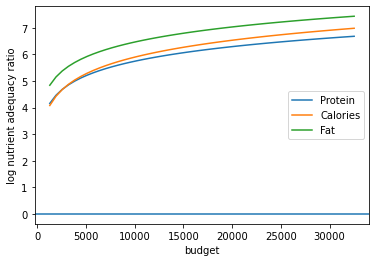

In [102]:
X = np.linspace(reference_x/5,reference_x*5,50)
X = X.flatten()
ndf = pd.concat({x:np.log(nutrient_adequacy_ratio(x,p))[UseNutrients] for x in X},axis=1).T

ax = ndf.plot()

ax.set_xlabel('budget')
ax.set_ylabel('log nutrient adequacy ratio')
ax.axhline(0)


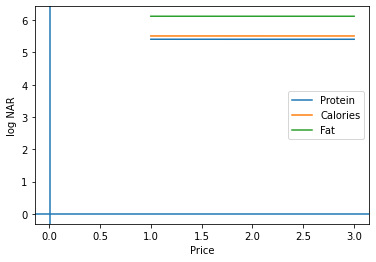

In [103]:
poorer_x = reference_x/2

Pscale = np.linspace(1,3,20).tolist()

log_nar = {s0:np.log(nutrient_adequacy_ratio(reference_x,my_prices(s0,p,i=USE_GOOD)))[UseNutrients] for s0 in Pscale}

log_nar = pd.DataFrame(log_nar).T

ax = log_nar.plot(ylabel='log NAR',xlabel='Price')


ax.axhline(0)
ax.axvline(p[USE_GOOD])